In [124]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from pyvis.network import Network


In [125]:
class LondonStation:
    def __init__(self, Station, osX, osY, Zone,Number):
        self.Station=Station
        self.osX=osX
        self.osY=osY
        self.Zone=Zone
        self.Number=Number
       

In [126]:
class LondonTubelines:
    def __init__(self, tubeline, fromStation, toStation,color):
        self.tubeline=tubeline
        self.fromStation=fromStation
        self.toStation=toStation
        self.color=color

In [127]:
Stations = []
with open("London stations.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        Station = row['Station']
        osX=row['OS X']
        osY=row['OS Y']
        Zone = row['Zone'].split(',')
        Number=row['Number']
        Stations.append(LondonStation(Station,osX,osY,Zone,Number))
print(Stations[10].Station)

Alexandra Palace


In [128]:
Tubelines = []
with open("London tube lines.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        tubeline = row['Tube Line']
        fromStation=row['From Station']
        toStation=row['To Station']
        color=row['Color']
        Tubelines.append(LondonTubelines(tubeline, fromStation, toStation,color))
print(Tubelines[10].fromStation)

Maida Vale


In [129]:
StationMap = nx.Graph()

In [130]:
pos={}
nodelist=[]
edgelist=[]
osXList=[]
osYList=[]
labels={}
dist=0
color=[]

In [131]:
for s in Stations:
    pos[s.Station]=(int(s.osX), int(s.osY))
    nodelist.append(s.Station)
    osXList.append(s.osX)
    osYList.append(s.osY)
    labels[s.Station]=s.Station
    StationMap.add_node(s,Station=str(s.Station))

In [132]:
for s1 in Stations:
    for s2 in Stations:
        if not s1 == s2:
            for s in Tubelines:
                if s1.Station==s.fromStation and s2.Station==s.toStation:
                    edgelist.append((s1.Station,s2.Station))
                    dist=(((int(s1.osX)-int(s2.osX))**2 + (int(s1.osY)-int(s2.osY))**2)**0.5)/1000
                    StationMap.add_edge(s1,s2,weight=dist)
                    color.append(s.color)


{'Abbey Road': Text(539081, 183352, 'Abbey Road'),
 'Abbey Wood': Text(547297, 179002, 'Abbey Wood'),
 'Acton Central': Text(520613, 180299, 'Acton Central'),
 'Acton Main Line': Text(520296, 181196, 'Acton Main Line'),
 'Acton Town': Text(519457, 179639, 'Acton Town'),
 'Addington Village': Text(537082, 163744, 'Addington Village'),
 'Addiscombe': Text(534190, 166290, 'Addiscombe'),
 'Albany Park': Text(547903, 172902, 'Albany Park'),
 'Aldgate': Text(533629, 181246, 'Aldgate'),
 'Aldgate East': Text(533809, 181333, 'Aldgate East'),
 'Alexandra Palace': Text(530300, 190498, 'Alexandra Palace'),
 'All Saints': Text(538012, 180933, 'All Saints'),
 'Alperton': Text(518025, 183849, 'Alperton'),
 'Amersham': Text(496454, 198181, 'Amersham'),
 'Ampere Way': Text(530674, 166476, 'Ampere Way'),
 'Anerley': Text(534656, 169942, 'Anerley'),
 'Angel': Text(531497, 183263, 'Angel'),
 'Angel Road': Text(535204, 192202, 'Angel Road'),
 'Archway': Text(529356, 186827, 'Archway'),
 'Arena': Text(5351

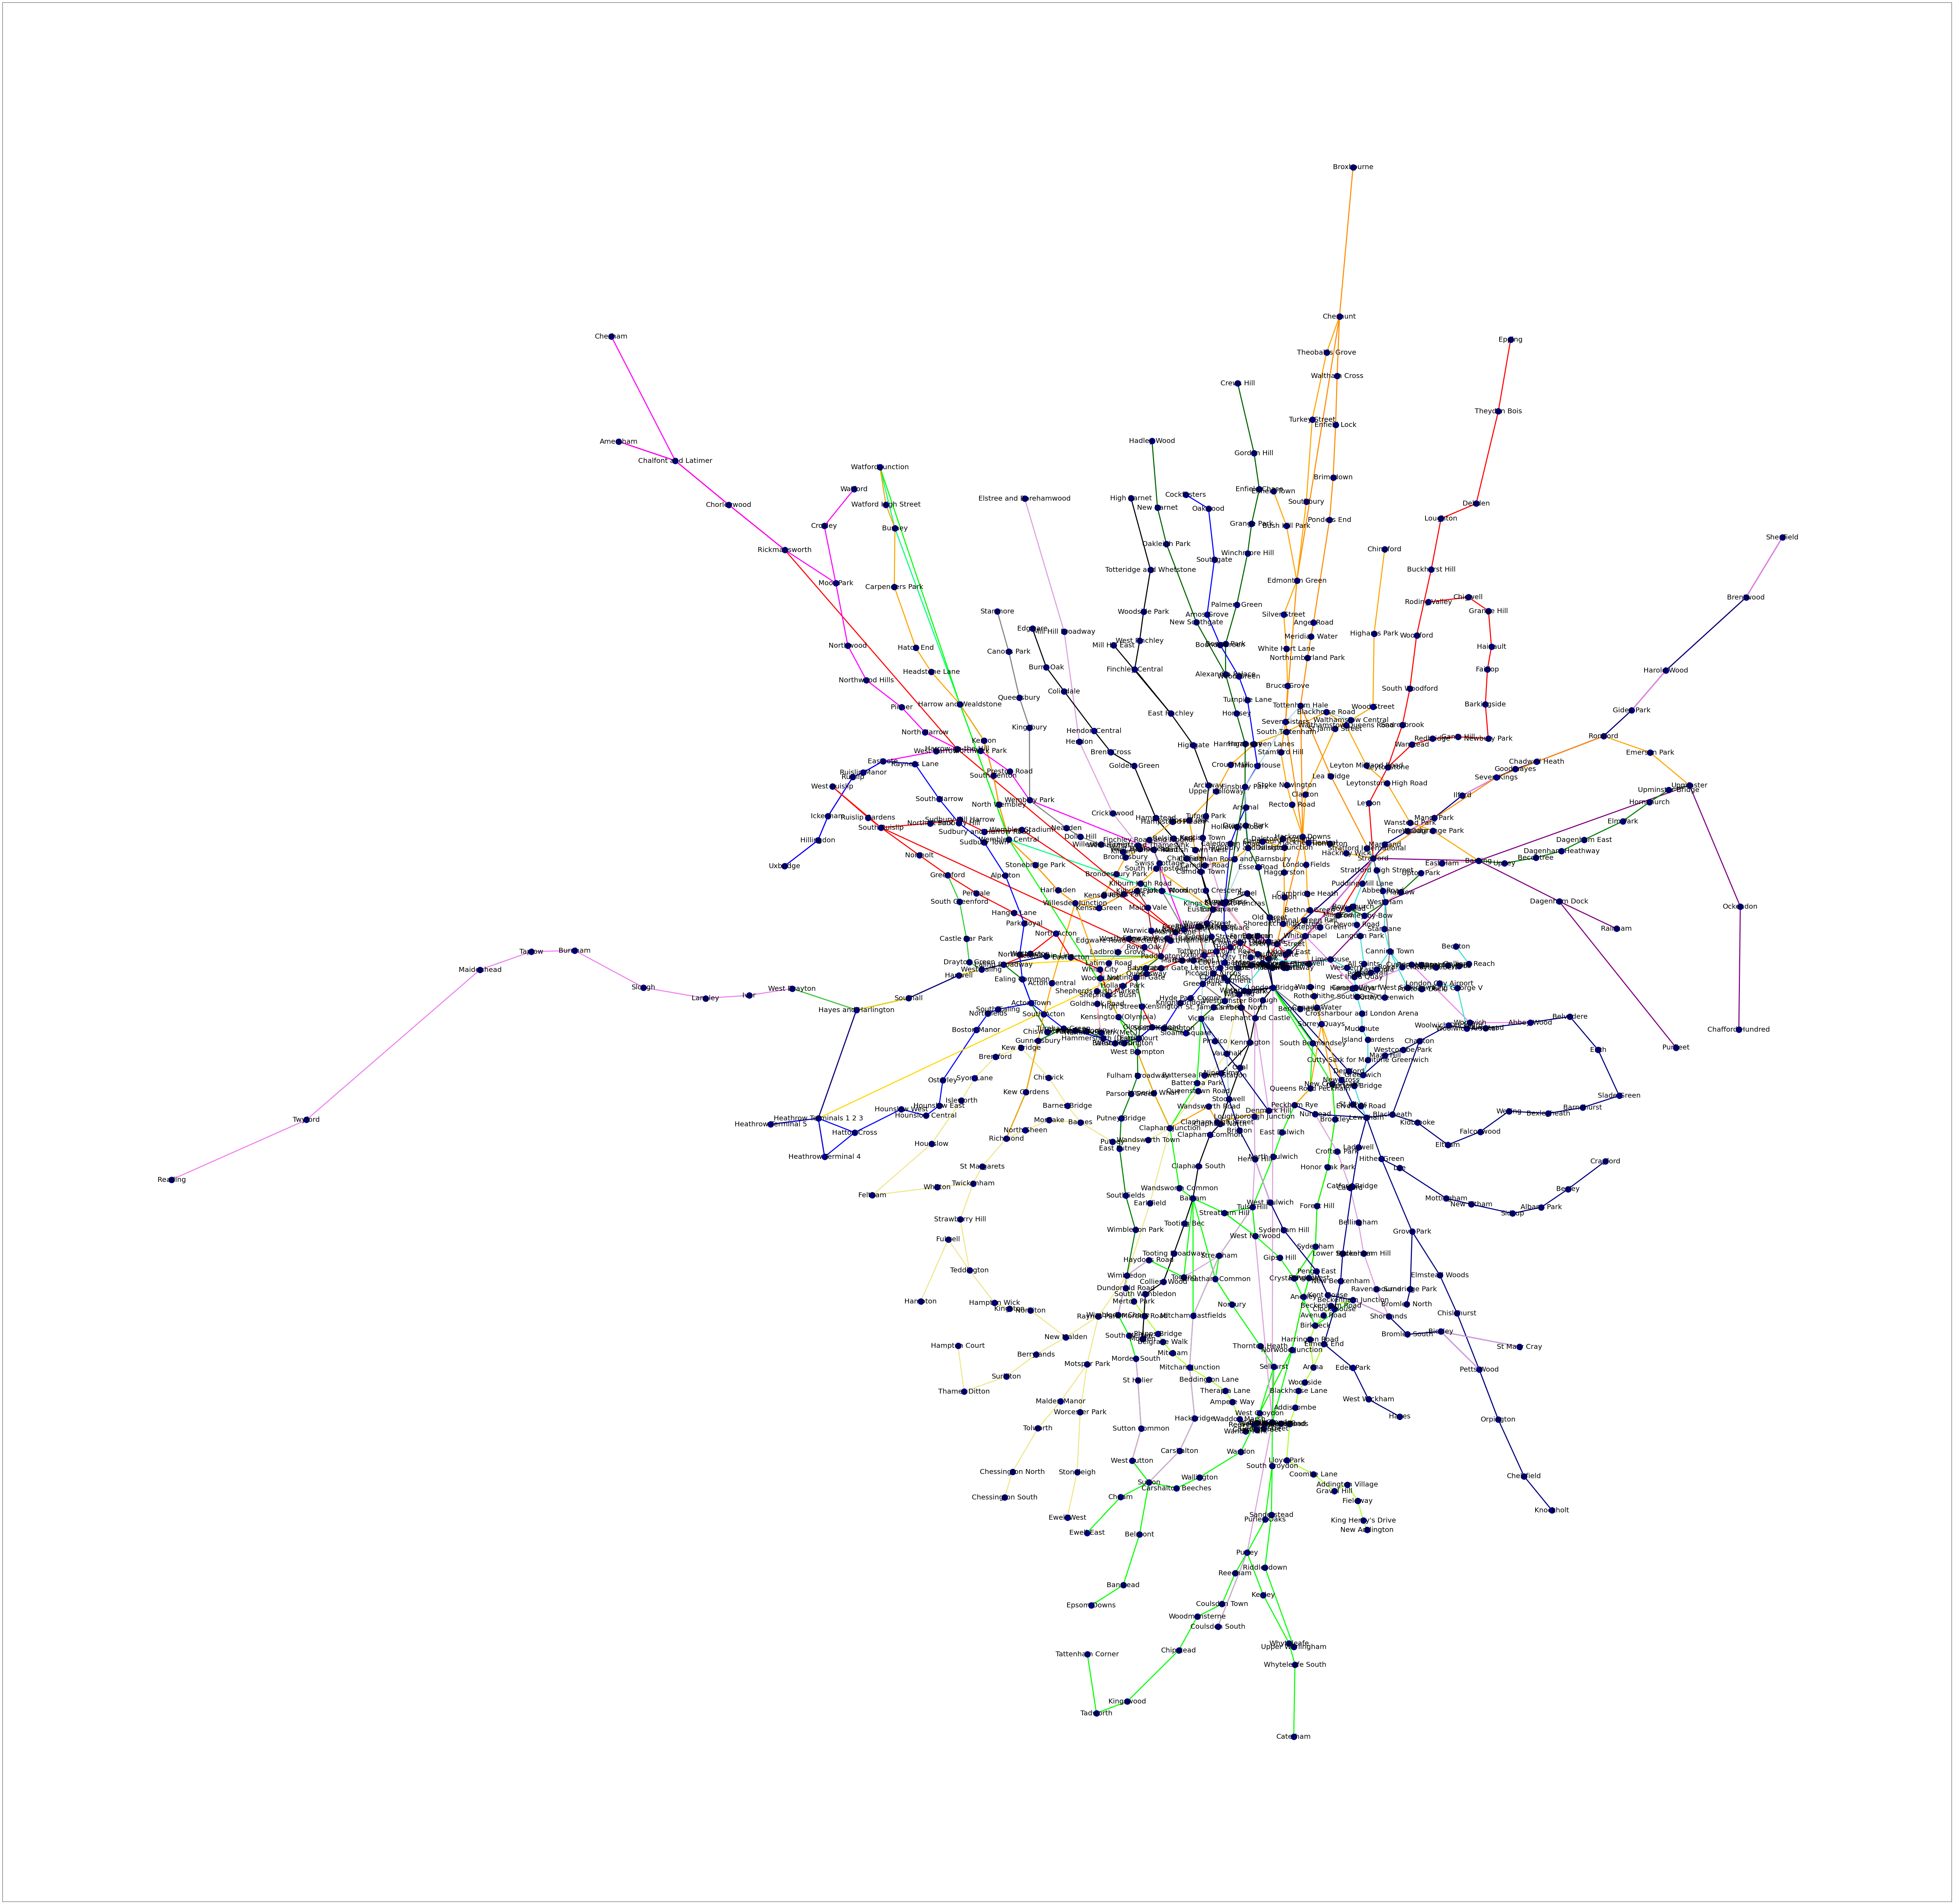

In [133]:
plt.figure(1, figsize = (100, 100))
nx.draw_networkx_nodes(StationMap,pos,node_size=300,nodelist=nodelist,node_color='darkblue')
nx.draw_networkx_edges(StationMap,pos,edgelist=edgelist,width=3,edge_color=color)
nx.draw_networkx_labels(StationMap, pos, labels=labels, font_size=20, font_color='k', font_family='sans-serif', font_weight='normal', horizontalalignment='center', verticalalignment='center', ax=None, clip_on=True)

Here we get the map of London underground with correct locations, and the next step is to caclute the shortest path between 2 selected stations by using dijkstra algorithm.

In [134]:
startStation='Eden Park'
endStation='Edgware'

Input the start station and the end station.

In [135]:
routepoint=[]
route=[]
nodeCode=list(StationMap.nodes())
nodeName=list(StationMap.nodes('Station'))
for s1 in Stations:
    for s2 in Stations:
        if not s1 == s2:
            if s1.Station==startStation and s2.Station==endStation:
                routepoint=nx.dijkstra_path(StationMap, s1, s2) 


In [136]:
transferToName=[]
routepointPos={}
routeEdge=[]
routeLabels={}
routecolor=[]


for i in range(len(routepoint)):
    for s,c,x,y in zip(nodelist,nodeCode,osXList,osYList):
        if c==routepoint[i]:
            transferToName.append(s)
            routepointPos[s]=(int(x), int(y))
            routeLabels[s]=s
            del labels[s]

for i in range(len(transferToName)):
    if(i+1)<len(transferToName):
        routeEdge.append((transferToName[i],transferToName[i+1]))

for s1 in transferToName:
    for s2 in transferToName:
        if not s1 == s2:
            for s in Tubelines:
                if s1==s.fromStation and s2==s.toStation:
                    routecolor.append(s.color)       

        
          
print(transferToName)
print(routepointPos)
print(routeEdge)
print(routeLabels)
print(routecolor)

['Eden Park', 'Elmers End', 'Arena', 'Harrington Road', 'Birkbeck', 'Crystal Palace', 'Gipsy Hill', 'West Norwood', 'Tulse Hill', 'Herne Hill', 'Brixton', 'Victoria', 'Green Park', 'Oxford Circus', 'Warren Street', 'Euston', 'Camden Town', 'Chalk Farm', 'Belsize Park', 'Hampstead', 'Golders Green', 'Brent Cross', 'Hendon Central', 'Colindale', 'Burnt Oak', 'Edgware']
{'Eden Park': (537396, 167598), 'Elmers End': (535788, 168389), 'Arena': (535192, 167620), 'Harrington Road': (535002, 168535), 'Birkbeck': (535297, 168996), 'Crystal Palace': (534120, 170557), 'Gipsy Hill': (533321, 171237), 'West Norwood': (531956, 171955), 'Tulse Hill': (531797, 172903), 'Herne Hill': (531934, 174486), 'Brixton': (531076, 175437), 'Victoria': (528941, 179131), 'Green Park': (529012, 180283), 'Oxford Circus': (529102, 181227), 'Warren Street': (529253, 182272), 'Euston': (529587, 182735), 'Camden Town': (528920, 183976), 'Chalk Farm': (528126, 184421), 'Belsize Park': (527399, 185075), 'Hampstead': (5264

{'Eden Park': Text(537396, 167598, 'Eden Park'),
 'Elmers End': Text(535788, 168389, 'Elmers End'),
 'Arena': Text(535192, 167620, 'Arena'),
 'Harrington Road': Text(535002, 168535, 'Harrington Road'),
 'Birkbeck': Text(535297, 168996, 'Birkbeck'),
 'Crystal Palace': Text(534120, 170557, 'Crystal Palace'),
 'Gipsy Hill': Text(533321, 171237, 'Gipsy Hill'),
 'West Norwood': Text(531956, 171955, 'West Norwood'),
 'Tulse Hill': Text(531797, 172903, 'Tulse Hill'),
 'Herne Hill': Text(531934, 174486, 'Herne Hill'),
 'Brixton': Text(531076, 175437, 'Brixton'),
 'Victoria': Text(528941, 179131, 'Victoria'),
 'Green Park': Text(529012, 180283, 'Green Park'),
 'Oxford Circus': Text(529102, 181227, 'Oxford Circus'),
 'Warren Street': Text(529253, 182272, 'Warren Street'),
 'Euston': Text(529587, 182735, 'Euston'),
 'Camden Town': Text(528920, 183976, 'Camden Town'),
 'Chalk Farm': Text(528126, 184421, 'Chalk Farm'),
 'Belsize Park': Text(527399, 185075, 'Belsize Park'),
 'Hampstead': Text(526408

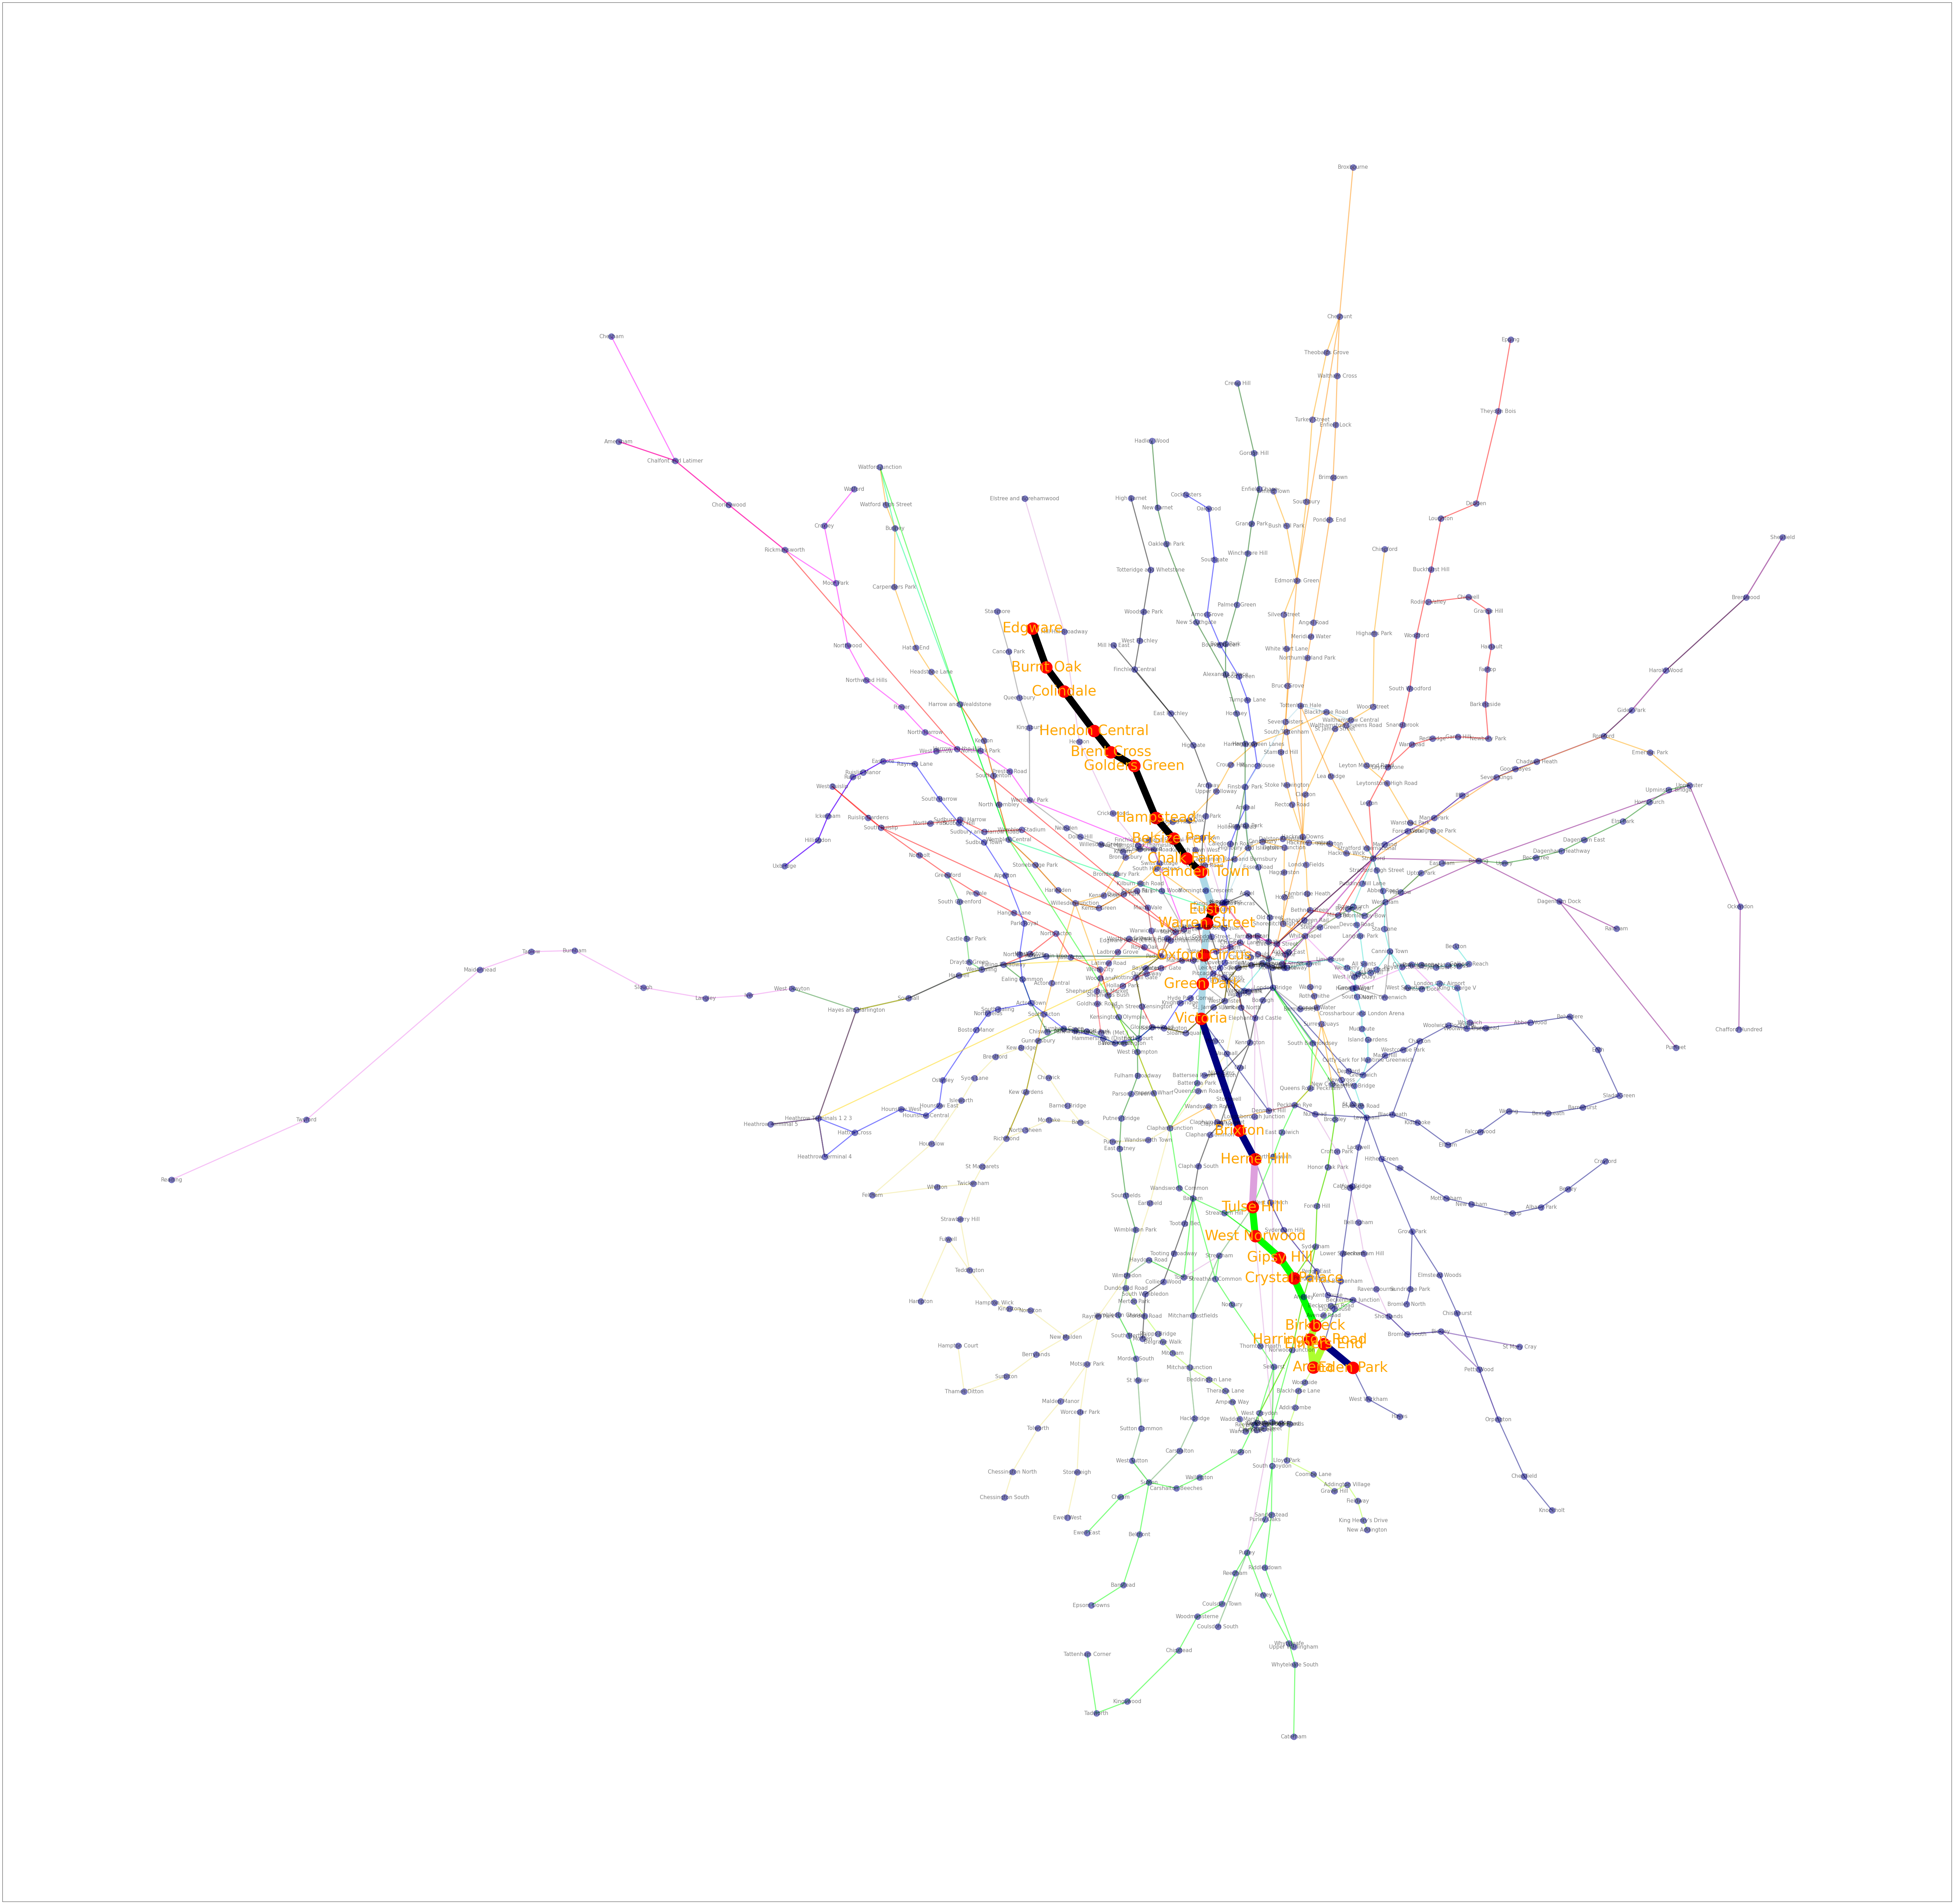

In [141]:
plt.figure(1, figsize = (100, 100))
nx.draw_networkx_nodes(StationMap,pos,node_size=300,nodelist=nodelist,node_color='darkblue',alpha=0.5)
nx.draw_networkx_edges(StationMap,pos,edgelist=edgelist,width=3,edge_color=color,alpha=0.5)
nx.draw_networkx_labels(StationMap, pos, labels=labels, font_size=15, font_color='k', font_family='sans-serif', font_weight='normal', horizontalalignment='center', verticalalignment='center', ax=None, clip_on=True,alpha=0.5)

nx.draw_networkx_nodes(StationMap,routepointPos,node_size=1200,nodelist=transferToName,node_color='red')
nx.draw_networkx_edges(StationMap,routepointPos,edgelist=routeEdge,width=20,edge_color=routecolor)
nx.draw_networkx_labels(StationMap, pos, labels=routeLabels, font_size=40, font_color='orange', font_family='sans-serif', font_weight='normal', horizontalalignment='center', verticalalignment='center', ax=None, clip_on=True)

By using dijkstra, we can find the shortest path between 2 chosen stations, which is the thick path in the graph, and we can also find what stations the path going through.We can find that there are 26 stations on the path, and the train is tranferred for 9 times.